In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as spopt
import scipy.fftpack as spfft
import scipy.ndimage as spimg
import scipy as sp
import matplotlib.image as img
import matplotlib.cm as cm
import cvxpy as cvx
import time
start_time = time.time()

In [2]:
def dct2(x):
        return spfft.dct(spfft.dct(x.T, norm='ortho', axis=0).T, norm='ortho', axis=0)
def idct2(x):
        return spfft.idct(spfft.idct(x.T, norm='ortho', axis=0).T, norm='ortho', axis=0)

In [3]:
pic=img.imread('itu.jpg')
print(pic.shape)
pic_zoom=pic
s=0.5 #sampling data ratio
row,col,channel=pic_zoom.shape
print(channel)
print(channel)
k=round(row*col*s)
ri = np.random.choice(row *  col, k, replace=False)
Xa=np.zeros(pic.shape)
masks = np.zeros(pic.shape)

(50, 50, 3)
3
3


In [4]:
for j in range(channel):
    xx=pic_zoom[:,:,j].squeeze()
    
    X = 255 * np.ones(xx.shape)
    X.T.flat[ri] = xx.T.flat[ri]
    masks[:,:,j]=X
    b = xx.T.flat[ri].astype(float)
    A = np.kron(spfft.idct(np.identity(col), norm='ortho', axis=0),spfft.idct(np.identity(row), norm='ortho', axis=0))
    
    A = A[ri,:] # same as phi times kron
    lamda=0.1 #penalty factor
    vx = cvx.Variable(row * col)
    cost=(0.5)*(cvx.norm2(b-(A @vx))**2)+(lamda*cvx.norm(vx, 1))
    objective =cvx.Minimize(cost)
    prob = cvx.Problem(objective)
    result = prob.solve(verbose=True)
    
    
    x=np.array(vx.value).squeeze()
    x=x.reshape(col,row).T
    Xa[:,:,j] = idct2(x)
    


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  -2.913e-01  +5e+05  1e+00  1e+00  1e+00  9e+01    ---    ---    1  1  - |  -  - 
 1  +1.076e+05  +1.077e+05  +5e+05  9e+01  1e+02  2e+02  9e+01  0.0008  1e+00   2  2  2 |  0  0
 2  +2.086e+02  +2.828e+03  +5e+05  1e+00  2e+00  3e+03  9e+01  0.0015  1e+00   2  1  1 |  0  0
 3  +8.251e+02  +5.765e+03  +5e+05  2e+00  2e+00  5e+03  9e+01  0.0224  7e-01   2  2  2 |  0  0
 4  +9.784e+02  +5.270e+03  +5e+05  2e+00  2e+00  4e+03  9e+01  0.0035  1e+00   2  1  1 |  0  0
 5  +2.863e+03  +1.792e+04  +4e+05  2e+00  2e+00  2e+04  9e+01  0.1044  8e-01   2  1  2 |  0  0
 6  +3.435e+03  +1.201e+04  +4e+05  1e+00  1e+00  9e+03  9e+01  0.0823  9e-01   1  1  1 |  0  0
 7  +3.128e+03  +8.884e+03  +4e+05  7e-01  9e-01  6e+03  8e+01  0.0999  6e-01   1  1  1 |  0  0
 8  +1.634e+03  +7.009e+03  +4e+05  4e-01  7e-

 7  +9.272e+02  +4.303e+03  +6e+05  9e-02  3e-01  3e+03  1e+02  0.1637  5e-01   2  1  1 |  0  0
 8  +2.045e+02  +3.074e+03  +6e+05  4e-02  2e-01  3e+03  1e+02  0.1937  8e-01   3  1  1 |  0  0
 9  +2.019e+03  +6.037e+03  +5e+05  2e-01  1e-01  4e+03  1e+02  0.4066  9e-01   2  1  1 |  0  0
10  +3.665e+03  +5.414e+03  +4e+05  6e-02  6e-02  2e+03  8e+01  0.3360  2e-01   2  1  1 |  0  0
11  +4.432e+03  +4.985e+03  +2e+05  1e-02  2e-02  6e+02  4e+01  0.5480  2e-01   2  1  1 |  0  0
12  +4.519e+03  +5.086e+03  +2e+05  2e-02  1e-02  6e+02  4e+01  0.0973  8e-01   1  1  1 |  0  0
13  +4.178e+03  +4.518e+03  +2e+05  1e-02  1e-02  3e+02  4e+01  0.4318  8e-01   3  1  1 |  0  0
14  +4.165e+03  +4.496e+03  +2e+05  1e-02  1e-02  3e+02  4e+01  0.0240  6e-01   2  1  1 |  0  0
15  +4.027e+03  +4.209e+03  +2e+05  7e-03  9e-03  2e+02  3e+01  0.5682  7e-01   1  1  1 |  0  0
16  +4.009e+03  +4.110e+03  +1e+05  5e-03  7e-03  1e+02  3e+01  0.5049  7e-01   3  1  1 |  0  0
17  +3.752e+03  +3.773e+03  +4e+04  1e-0

--- 757.8510985374451 seconds ---


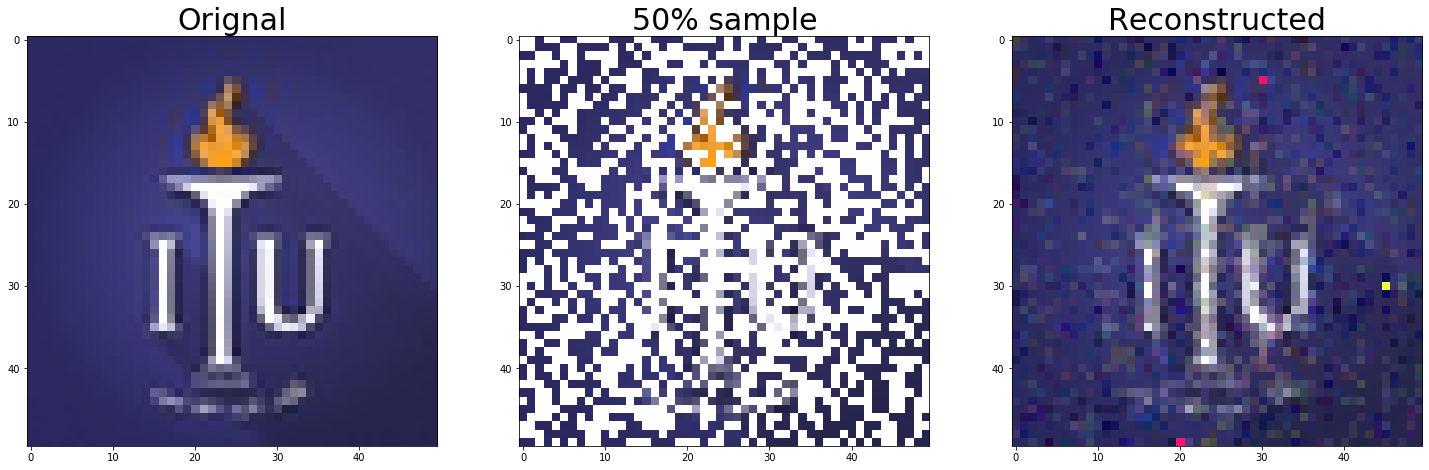

In [5]:

fig,axis=plt.subplots(1,3,figsize=(25,25))
axis[0].imshow(np.uint8(pic))
axis[0].set_title('Orignal',fontsize=30)
axis[1].imshow(np.uint8(masks))
axis[1].set_title('50% sample',fontsize=30)
axis[2].imshow(np.uint8(Xa))
axis[2].set_title('Reconstructed',fontsize=30)


print("--- %s seconds ---" % (time.time() - start_time))
